<a href="https://colab.research.google.com/github/AV-Gorshkov/Python_netology/blob/main/PY_%D0%A1%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание_1
  - Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace).
  - Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей.
  - Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р.
  - Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [1]:
!pip install hmmlearn

In [2]:
import numpy as np
import pandas as pd

import re

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Для каждого тома проведем очистку оставив только русские буквы и пробелы, а также преобразуем к нижнему регистру, т.к. он нам не важен.

In [3]:
#  загрузка данных

param = r'/content/drive/My Drive/Нетология/ML/Временные_ряды/Случайные марковские процессы/дз/'

file = 'war_and_peace_tom_'   # 'war_and_peace_tom_1.txt

In [4]:
#  функция для закгрузки текста и преобразования
# (только русские буквы и пробелы,в нижнем регистре)

def read_and_clean(f_name):

    with open(f_name, "r") as f:

        text = f.read().lower()

    return re.sub("[^а-я ]","", text)


In [5]:
# объеденим 4 тома текста в один

tom_count = 4
text = []
for i in range( tom_count ):
    text.append(read_and_clean(f'{param}{file}{i + 1}.txt') )

In [6]:
# составим словарь из букв и пробела.
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [7]:
# матрица переходных вероятностей.

probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))
for i in range(tom_count):
    for cp, cn in zip( text[i][:-1], text[i][1:]):
        probabilities[POS[cp], POS[cn]] += 1
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

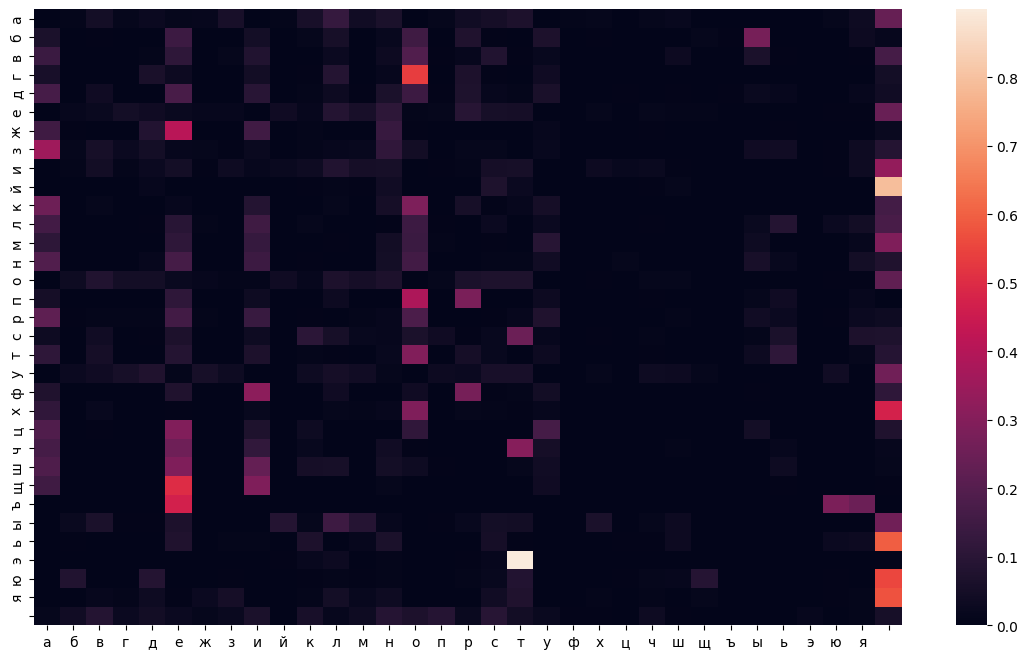

In [8]:
# тепловая карта матрицы переходных вероятностей.

plt.figure(figsize=(14, 8))

sns.heatmap(pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN)))
plt.show()

In [9]:
# Определим вероятность встретить строку из 4-х символов, которая начинается "п", а кончается на "р"

def get_word (st, end, cnt, st_lts, proba=1):

    if proba == 0:
        return

    if cnt == 2:
        proba *= 1.0 / len(RUSSIAN) * probabilities[POS[st], POS[end]] # первый и последний символ текста
        if proba > 0:

           global word, probs
           word.append(st_lts + end)
           probs.append(proba)
        return

    for i, c in enumerate(RUSSIAN):
        get_word(c, end, cnt - 1, st_lts + c, proba * probabilities[POS[st], POS[c]]) # промежуточные символы


# список слов
word = []
# список вероятностей
probs = []

start = "п"
end = "р"
cnt = 4

get_word(start, end, cnt, start)

df = pd.DataFrame({"tracks": word, "probs": probs})

print(f"вероятность слова из 4 букв п..р: {df['probs'].sum()}.")

df.head(10)

вероятность слова из 4 букв п..р: 0.0009779699840321609.


,tracks,probs
0,паар,1.286129e-08
1,пабр,1.046330e-06
2,павр,1.194306e-06
3,пагр,1.323745e-06
4,падр,3.031260e-06
5,паер,2.009415e-06
6,пажр,7.533524e-09
7,пазр,1.246233e-06
8,паир,2.624997e-08
9,пайр,2.843714e-08


Используя матрицу переходных вероятностей создадим генератор слов указанной длины, начинающихся с заданной буквы.

In [10]:
#  генерирование выбороки из марковской цепи
# последовательность букв указанной длины, начинающихся с заданной буквы.

def get_seq(start, length):
    s = []
    s.append(start)
    for i in range(length - 1):
        index = POS[s[i]]
        next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
        s.append(next_char)
    return ''.join(s)

In [11]:
# последовательность из 8 символов, начинающихся на букву "б".

# сгенерируем 7 слов
word_сnt = 7

letter = "б"
length = 8

for i in range( word_сnt):
    print(get_seq(letter, length))

белы ота
брликоть
бсядрьи 
бе убы п
бодескос
беслобу 
бннь во 


#Задание_2
  Датасет "International airline passengers: monthly totals in thousands"
  
 - Выберите временной ряд и оцените его через HMM.
 - Построить, через среднее каждой компоненты, наивный прогноз ряда

In [12]:
# Тест Дики-Фуллера
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    #  визуализация графиков
def tsplot(y, name, lags=None, figsize=(14, 6), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='Green', label='Or')
        ts_ax.set_title(name)

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


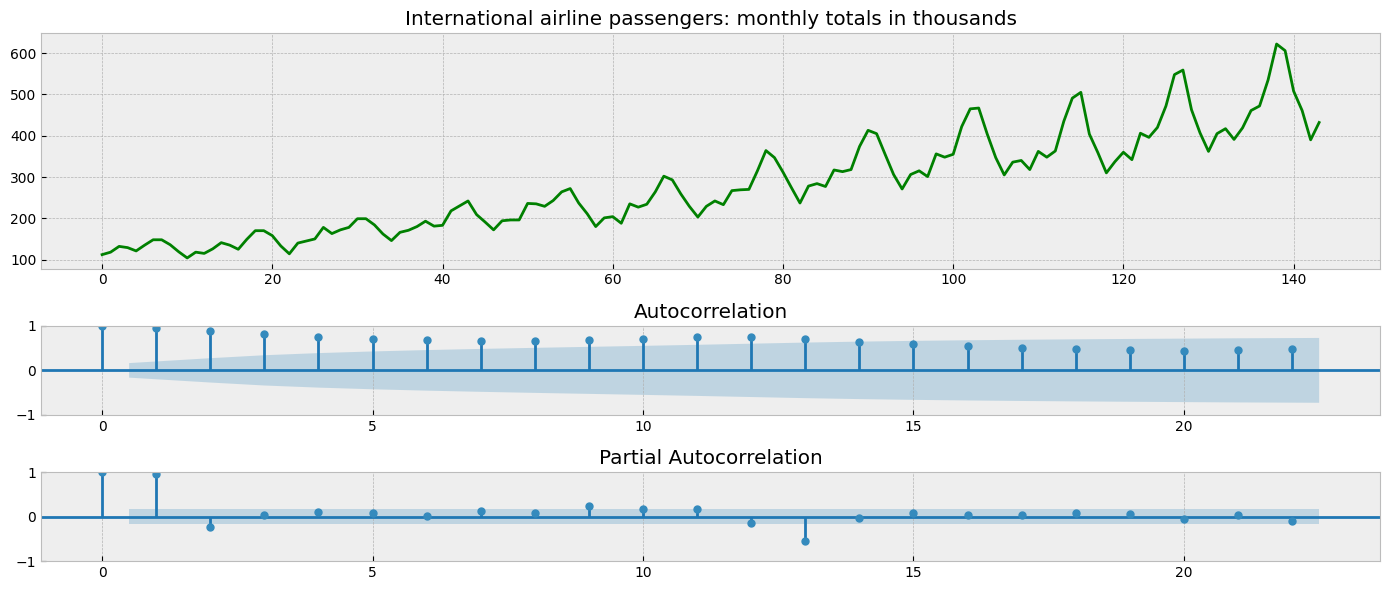

In [13]:
param_2 = r'/content/drive/My Drive/Нетология/ML/Временные_ряды/1_знакомство_с_временными_рядами/Series/'

file_2 = 'international-airline-passengers.csv'
airlines_passengers = pd.read_csv(f'{param_2}{file_2}', sep = ',')

name = 'International airline passengers: monthly totals in thousands'

series = airlines_passengers['Count']

tsplot(series, name)

График нестационарный, имеется и тренд и сезонность.

Перед использованием HMM необходимо избавиться от тренда и уменьшить изменение дисперсии. Выполним преобраование Бокса-Кокса и дифференцирование.

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


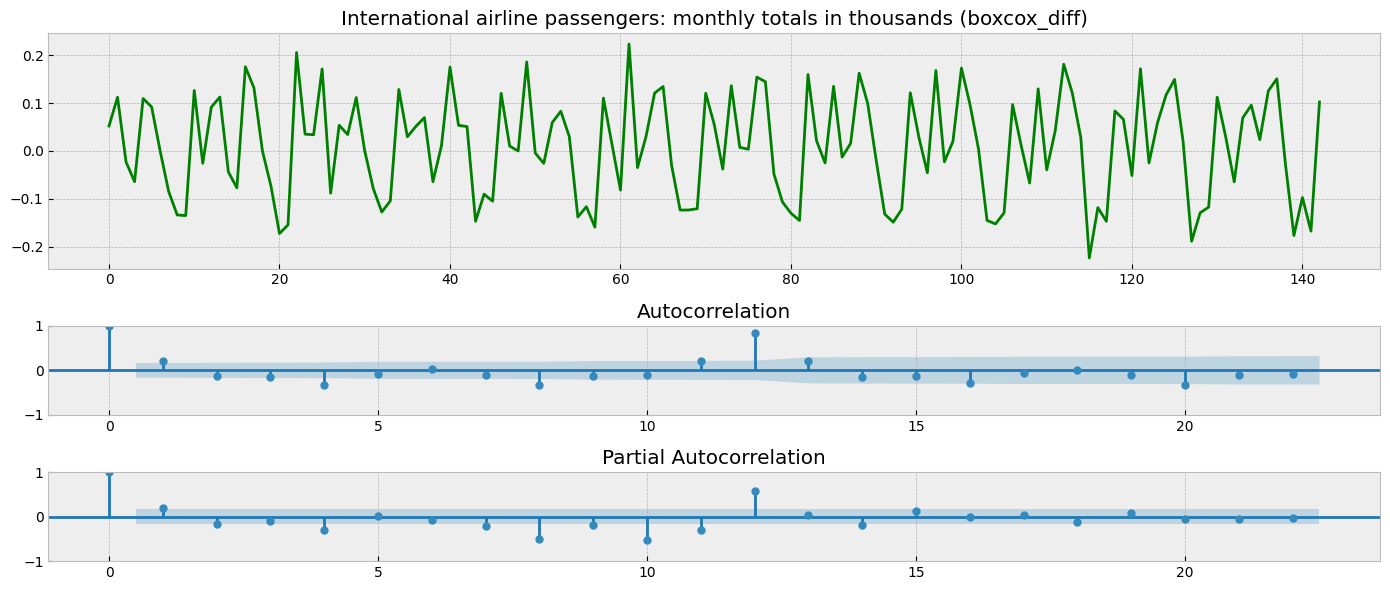

In [14]:
# Перед использованием HMM необходимо избавиться от тренда и уменьшить изменение дисперсии.

# уберем изменение дисперсии при помощи преобразования Бокса-Кокса
series_diff = boxcox(series, 0)

#  уберем наличие тренда, дифференцированием.
series_diff = series_diff[1:] - series_diff[:-1]

tsplot(series_diff, name + ' (boxcox_diff)')

Разделим выборку на train и test.

In [15]:
# разделим выборку на train и test.

def train_test_split(ser, test_val=0.3):

    count = int(len(ser) * (1.0 - test_val))
    return ser[:count], ser[count:]

train, test = train_test_split( series_diff, 0.3)
train_r = train.reshape(-1, 1)
test_r = test.reshape(-1, 1)

# len(series_diff),
# len(train_r),
# len(test_r)

Довольно сложно определить сколько должно быть скрытых состояний, поэтому предположим, что у нас их максимум 12 и подберем оптимальное их кол-во.

In [16]:
#  Определим кол-во скрытых состояний

indx = []
score = []

for i in range(1, 14):
    mdl = GaussianHMM(n_components=i, n_iter=1000)
    mdl.fit(train_r)
    scor = mdl.score(train_r)
    indx.append(i)
    score.append(scor)

# запишем результат в таблицу
res = pd.DataFrame({"index": indx, "score": score}).set_index("index")

res

,score
index,
1,86.195118
2,92.180343
3,122.394115
4,138.499511
5,140.417265
6,128.309421
7,131.944519
8,133.143465
9,141.490118


In [17]:
opt = res["score"].idxmax()

print(f'Наилучшее значение score {round(res["score"].max(), 3)} найдено при {opt} скрытых состояниях.')

Наилучшее значение score 165.226 найдено при 11 скрытых состояниях.


Теперь с наилучшим значением построим модель и выведем график на тренировочных данных и на тестовых.

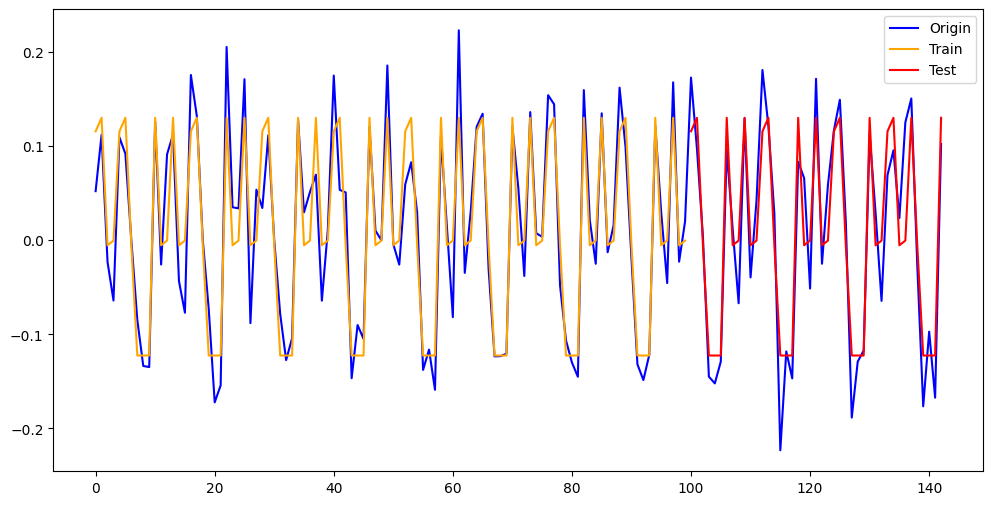

In [18]:
# построим модель и график на train и  test данных.

def get_averag (mdl, ser):

    labels = mdl.predict(ser)
    avg = np.zeros_like(ser)

    for i in range(mdl.n_components):
        avg[labels == i] = mdl.means_[i]
    return avg

mdl_hmm = GaussianHMM(n_components=opt, n_iter=1000)
mdl_hmm.fit(train_r)

avg_train = get_averag (mdl_hmm, train_r)
avg_test  = get_averag(mdl_hmm, test_r)

plt.figure(figsize=(12, 6))
plt.plot(series_diff, color='blue')

plt.plot(avg_train, color='orange')

plt.plot([i for i in range(len(train), len(series_diff))], avg_test, color = 'red')

plt.legend(["Origin", "Train", "Test"])
plt.show()

Получилась не идеальная, но довольно неплохое описание, а также прогноз. Кроме того, модель еще можно оптимизировать, задавая априорное распределения с помощью спецификации model.transmat_, кол-во итераций для градиентного спуска и др. параметры.

In [19]:
# Изобразим исходный ряд и наложим на него результаты работы модели HMM.

all_series = np.append(avg_train, avg_test)

offset = boxcox(series, 0)[-1]

def un_diff ( ser, offset):
  lst = [offset]
  end_el = offset
  len_ser = len(ser)

  for i in range(len_ser):

    end_el -= ser [ len_ser - i - 1]

    lst.append (end_el)

  ser_bc = np.array ( lst[ : : -1] )
  return  inv_boxcox ( ser_bc,0)

hmm_series =  un_diff( all_series, offset)

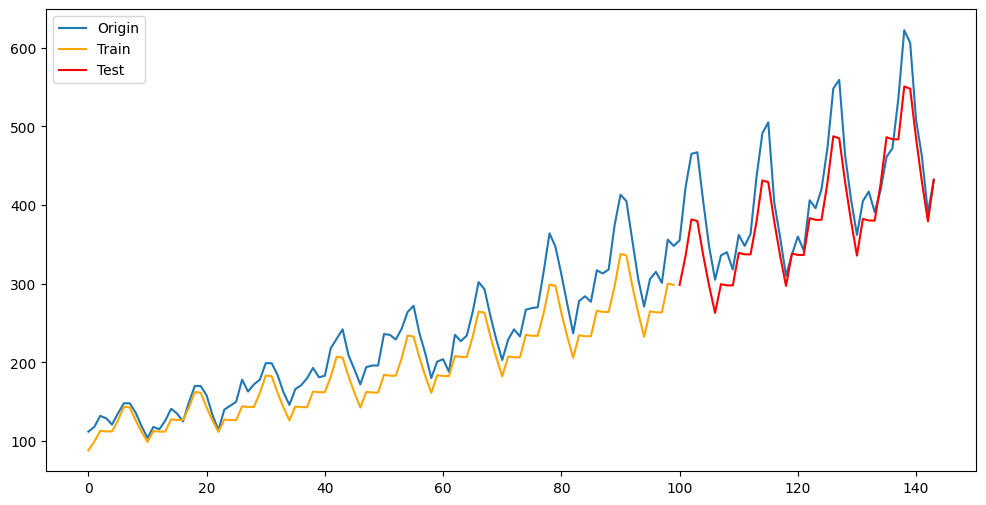

In [20]:
#  визуализация

plt.figure(figsize=(12, 6))
plt.plot(series)

plt.plot( hmm_series[:len(train)], color = 'orange')
plt.plot([i for i in range(len(train), len(series))], hmm_series[len(train):], color = 'red')

plt.legend(["Origin", "Train", "Test"])
plt.show()

График после применения обратного дифференцирования и обратного преобразования Бокса-Кокса довольно близко похож на исходный график.
Модель Hmm неплохо справилась с предсказание ряда.